In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('nbagg')
import matplotlib.pyplot as plt
plt.ioff()
import tensorflow as tf

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# View dimensions and some training images
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
# Normalisation of inputs
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Getting labels and convert to one-hot label
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

y_train = tf.one_hot(y_train, len(labels)).numpy()
y_test = tf.one_hot(y_test, len(labels)).numpy()

x_train: (60000, 28, 28)
y_train: (60000, 10)
x_test: (10000, 28, 28)
y_test: (10000, 10)


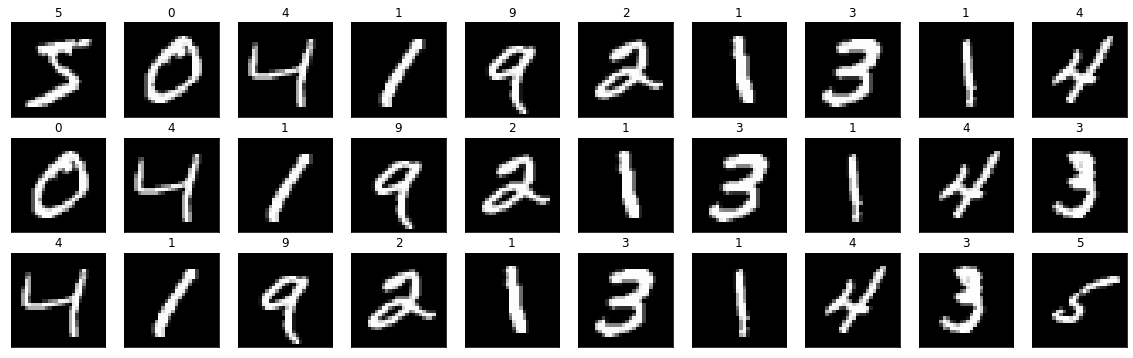

In [6]:
# View the dimensions again
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

fig, axes = plt.subplots(3, 10, figsize=[20, 6])
for i, j in zip(list(np.repeat(list(range(3)), 10)), list(range(10))*3):
    axes[i][j].imshow(x_train[i+j], cmap='gray', vmin=0, vmax=1)
    axes[i][j].set(xticks = (), yticks = (), title = str(y_train[i+j].argmax()))
fig.show()

In [7]:
# Creating the model`
input_layer = tf.keras.layers.Input(shape = tuple(x_train.shape[1:]), name = "Input_Layer")
LSTM_layer_1 = tf.keras.layers.LSTM(units = 50, return_sequences = True, name = "LSTM_Layer_1")(input_layer)
LSTM_layer_2 = tf.keras.layers.LSTM(units = 50, name = "LSTM_Layer_2")(LSTM_layer_1)
output_layer = tf.keras.layers.Dense(units = 10, activation = 'softmax', name = "Dense_Output_Layer")(LSTM_layer_2)

model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 LSTM_Layer_1 (LSTM)         (None, 28, 50)            15800     
                                                                 
 LSTM_Layer_2 (LSTM)         (None, 50)                20200     
                                                                 
 Dense_Output_Layer (Dense)  (None, 10)                510       
                                                                 
Total params: 36,510
Trainable params: 36,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [9]:
# Train the model
epochs = 25

history = model.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_test, y_test),
    epochs = epochs,
    verbose = 2,
)

Epoch 1/25
1875/1875 - 20s - loss: 0.4113 - accuracy: 0.8679 - val_loss: 0.1723 - val_accuracy: 0.9486 - 20s/epoch - 11ms/step
Epoch 2/25
1875/1875 - 11s - loss: 0.1240 - accuracy: 0.9625 - val_loss: 0.0957 - val_accuracy: 0.9710 - 11s/epoch - 6ms/step
Epoch 3/25
1875/1875 - 11s - loss: 0.0856 - accuracy: 0.9744 - val_loss: 0.0798 - val_accuracy: 0.9760 - 11s/epoch - 6ms/step
Epoch 4/25
1875/1875 - 10s - loss: 0.0644 - accuracy: 0.9802 - val_loss: 0.0603 - val_accuracy: 0.9810 - 10s/epoch - 6ms/step
Epoch 5/25
1875/1875 - 11s - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0523 - val_accuracy: 0.9841 - 11s/epoch - 6ms/step
Epoch 6/25
1875/1875 - 10s - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0507 - val_accuracy: 0.9841 - 10s/epoch - 6ms/step
Epoch 7/25
1875/1875 - 10s - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0552 - val_accuracy: 0.9829 - 10s/epoch - 5ms/step
Epoch 8/25
1875/1875 - 10s - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0443 - val_accuracy: 0.9871 - 10s/epoch - 

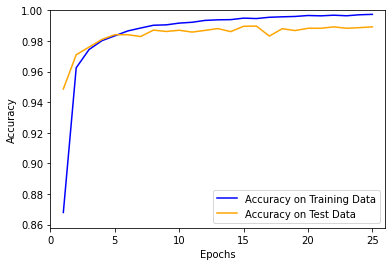

In [10]:
# Plot accuracy v/s epoch graph
ax = plt.subplot()

plt.xlim(0, epochs + 1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

ax.set_ylim(bottom = min(history.history['accuracy'] + history.history['val_accuracy']) - 0.01)
training_acc, = ax.plot(range(1, epochs+1), history.history['accuracy'], color="blue")
test_acc, = ax.plot(range(1, epochs+1), history.history['val_accuracy'], color="orange")

plt.legend([training_acc, test_acc], ["Accuracy on Training Data", "Accuracy on Test Data"])

plt.show()

The prediction is 0, and the value is 0


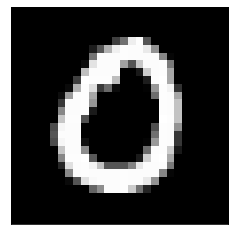

In [11]:
# Test the model for a random image in the test data
import random

img_idx = random.randint(0, 9999)

prediction = model.predict(x_test[img_idx].reshape(1, *x_test.shape[1:])).argmax()

print("The prediction is ", prediction, ", and the value is ", y_test[img_idx].argmax(), sep='')

ax = plt.subplot()
ax.imshow(x_test[img_idx], cmap='gray', vmin=0, vmax=1)
ax.set(xticks = [], yticks = [])
plt.show()

